In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#VISUALISING AND UNDERSTANDING THE DATASET

In [3]:
dftrain=pd.read_csv('/kaggle/input/titanic/train.csv')
dfeval=pd.read_csv('/kaggle/input/titanic/test.csv')

dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#observing the data set
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#missing data values
total=dftrain.isnull().sum().sort_values(ascending=False)
null_percentage=round(total*100/dftrain.isnull().count(),2)
missing_data=pd.concat([total,null_percentage],axis=1,keys=['Missing Data','Missing (%)'])
print(missing_data)

             Missing Data  Missing (%)
Cabin                 687        77.10
Age                   177        19.87
Embarked                2         0.22
PassengerId             0         0.00
Survived                0         0.00
Pclass                  0         0.00
Name                    0         0.00
Sex                     0         0.00
SibSp                   0         0.00
Parch                   0         0.00
Ticket                  0         0.00
Fare                    0         0.00


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

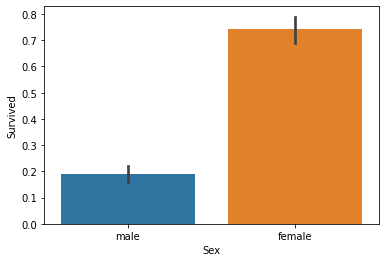

In [7]:
#survival distribution among sex
sns.barplot(x='Sex',y='Survived', data=dftrain)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

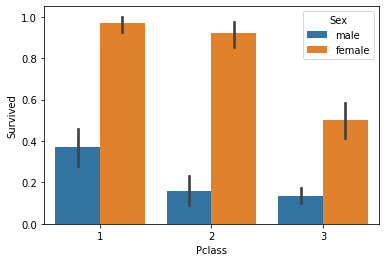

In [8]:
#survival distribution based on passenger class
sns.barplot(x='Pclass',y='Survived',hue='Sex', data=dftrain)

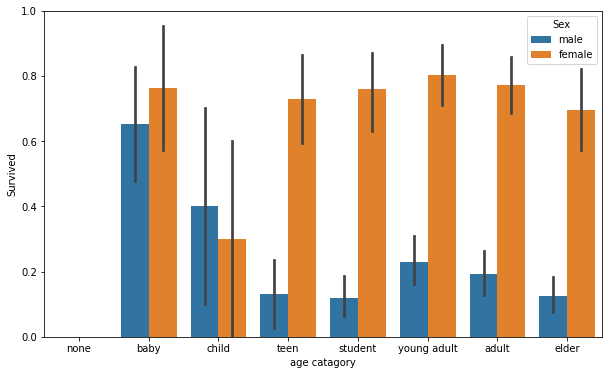

In [9]:
#survival distribution based ages ranges
def get_age_catagory(age):
    catagory=''
    if age<=-1: 
        catagory='none'
    elif age<=5:
        catagory='baby'
    elif age<=10:
        catagory='child'
    elif age<=18:
        catagory='teen'
    elif age<=25:
        catagory='student'
    elif age<=35:
        catagory='young adult'
    elif age<=60:
        catagory='adult'
    else:
        catagory='elder'
    return catagory

plt.figure(figsize=(10,6))
groups=['none','baby','child','teen','student','young adult','adult','elder']
dftrain['age catagory']=dftrain['Age'].apply(lambda x:get_age_catagory(x))
sns.barplot(x='age catagory', y='Survived', hue='Sex', data=dftrain, order=groups)
dftrain.drop('age catagory', axis=1, inplace=True)

In [10]:
dftrain['train_test']=1
dfeval['train_test']=0
dfeval['Survived']=np.NaN
all_data=pd.concat([dftrain,dfeval])

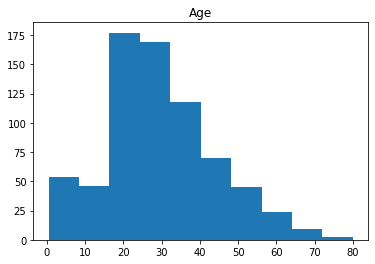

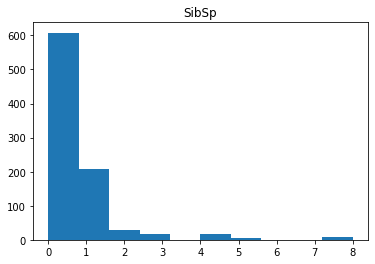

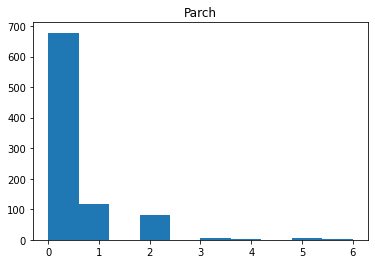

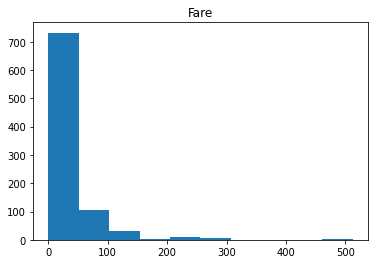

In [11]:
#passenger distribution among different catagories
df_num=dftrain[['Age','SibSp','Parch','Fare']]
df_cat = dftrain[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

for i in df_num.columns:
    plt.hist(dftrain[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

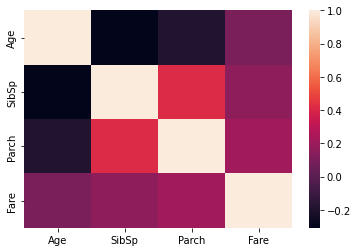

In [12]:
#co-relation betweem different features.
sns.heatmap(df_num.corr())

In [13]:
#co-relation between survival rate and Age, No of Siblings, Parch and Fare
pd.pivot_table(dftrain,index='Survived', values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [14]:
#co-relation between survival and passenger classes
pd.pivot_table(dftrain, index='Survived', columns='Pclass', values='Ticket', aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [15]:
#co-relation between survival and sex
pd.pivot_table(dftrain, index='Survived', columns='Sex', values='Ticket', aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [16]:
#FEATURE ENGINEERING

In [17]:
#checking whethe people had multiple cabins
df_cat.Cabin
dftrain['no_of_cabins']=dftrain.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
dftrain['no_of_cabins'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: no_of_cabins, dtype: int64

In [18]:
pd.pivot_table(dftrain, index='Survived',columns=['no_of_cabins'],values='Name',aggfunc='count')

no_of_cabins,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [19]:
#identifying patterns in cabin types
dftrain['cabin_type']=dftrain.Cabin.apply(lambda x:str(x)[0])
print(dftrain.cabin_type.value_counts())
pd.pivot_table(dftrain, index='Survived', columns=['cabin_type'],values='Name',aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_type, dtype: int64


cabin_type,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [20]:
dftrain['numeric_ticket']=dftrain.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
dftrain['letter_ticket']=dftrain.Ticket.apply(lambda x: ''.join(x.split(' ')[-1]).replace('.','').replace('/','').lower()
                                             if len(x.split(' ')[-1])>0 else 0)

In [21]:
#analyse title of passengers
dftrain.Name.head(50)
dftrain['title']=dftrain.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
dftrain['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: title, dtype: int64